In [3]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

from sklearn import metrics

### 1.- Obtención de los datos

In [5]:
df_modelado= pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_totales_balanced.csv',sep=',')
df_modelado

,Código Tipo Supuesto Urgente,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code,year,Quarteryear
0,30.0,11,0,1,1,2021,1.0
1,30.0,11,1,0,1,2021,1.0
2,40.0,5,6,0,1,2021,1.0
3,30.0,15,0,1,0,2021,1.0
4,40.0,10,6,0,1,2021,1.0
...,...,...,...,...,...,...,...
18858,50.0,6,1,1,0,2020,NaN
18859,50.0,6,0,1,1,2020,NaN
18860,50.0,6,1,1,0,2020,NaN
18861,50.0,6,2,1,1,2020,NaN


### 2.- Preparing TRAIN AND TEST DataFrames

In [7]:
X=df_modelado[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y=df_modelado['Código Tipo Supuesto Urgente']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)       # Genero los datos para entrenamiento y testeo
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(14147, 4)
(4716, 4)
(14147,)
(4716,)


In [10]:
train=pd.concat([X_train,y_train],axis=1)
train


,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code,Código Tipo Supuesto Urgente
15486,11,3,0,0,30.0
4612,10,4,0,0,40.0
4296,11,6,1,1,40.0
5866,6,2,0,1,30.0
7312,11,4,0,0,30.0
...,...,...,...,...,...
9225,8,2,1,1,10.0
13123,12,6,0,1,30.0
9845,2,6,0,1,40.0
10799,13,6,0,0,40.0


In [11]:
test=pd.concat([X_test,y_test],axis=1)
test

,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code,Código Tipo Supuesto Urgente
7896,6,6,0,0,40.0
7732,1,6,0,0,40.0
6946,11,1,1,1,40.0
3629,10,6,0,1,40.0
593,12,6,0,1,40.0
...,...,...,...,...,...
15320,1,6,0,0,30.0
17428,17,1,1,1,40.0
13578,6,2,1,1,10.0
17357,7,6,0,0,40.0


In [8]:
train.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',header=True,index=False)
test.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',header=True,index=False)

### 3.- My first Model (DecisionTreeClassifier)

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',sep=',')


In [12]:
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sexo_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [13]:
train['Código Tipo Supuesto Urgente'].value_counts()

40.0    5990
30.0    5530
50.0    1844
10.0     721
20.0      62
Name: Código Tipo Supuesto Urgente, dtype: int64

Accuracy 0.6974130619168787
Precision 0.3878614353797647
Recall 0.3550344628974059
ROC 0.7002393292584196
F1 0.34017715348841115


<AxesSubplot:>

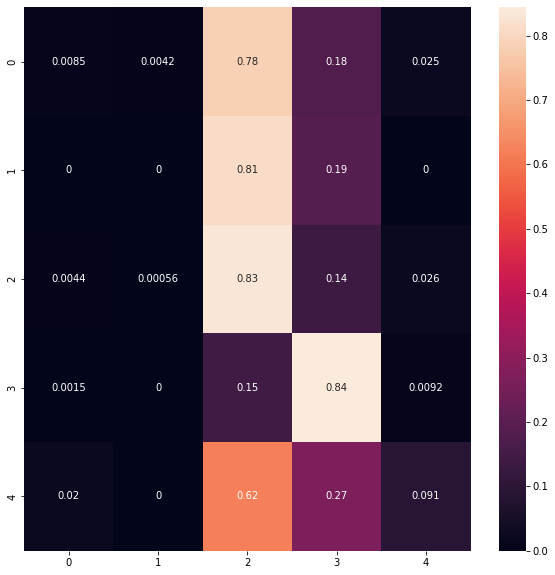

In [15]:
tree_reg = DecisionTreeClassifier(random_state=20)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)



print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred,average='macro'))
print('Recall', recall_score(y_test, y_pred,average='macro'))
print('ROC', roc_auc_score(y_test, tree_reg.predict_proba(X_test),multi_class='ovr'))
print('F1', f1_score(y_test, y_pred,average='macro'))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [16]:
def error_modelo(model):
    y_pred = model.predict(X_test)
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='macro')
    recall_model=recall_score(y_test, y_pred,average='macro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    f1_model=f1_score(y_test, y_pred,average='macro')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    print('Accuracy', acc_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('ROC', roc_auc_model)
    print('F1', f1_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)

Accuracy 0.6974130619168787
Precision 0.3878614353797647
Recall 0.3550344628974059
ROC 0.7002393292584196
F1 0.34017715348841115


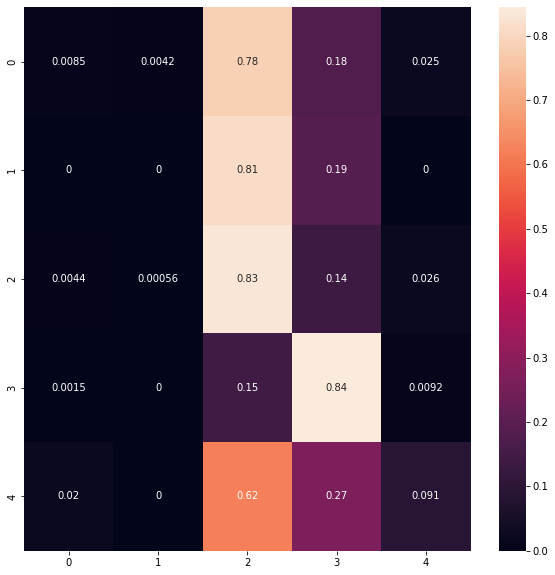

In [17]:
error_modelo(tree_reg)